In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import numpy as np
import cv2
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 9))

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

# Filtering

### A) removing noise

original


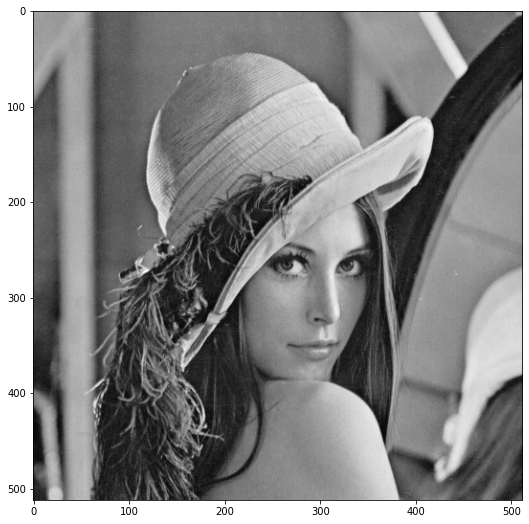

gauss noise


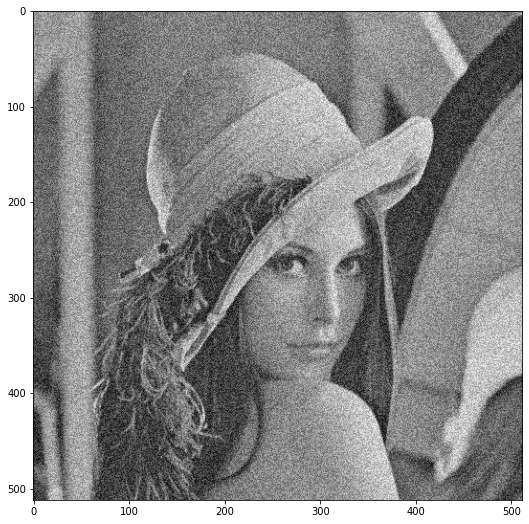

filtred gauss noise


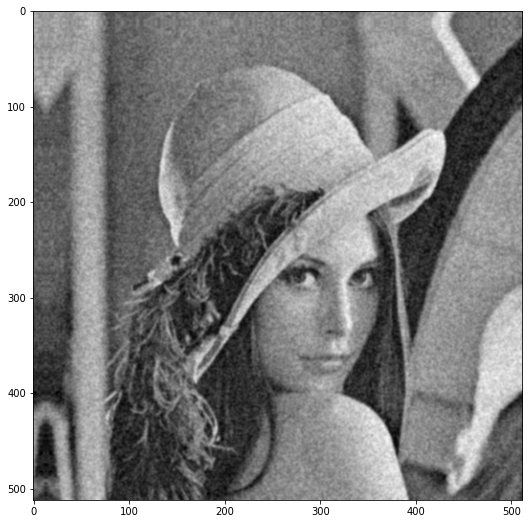

salt&pepper noise


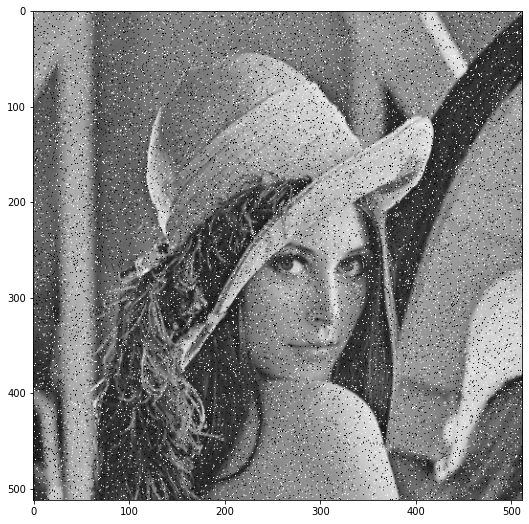

filtred s&p noise


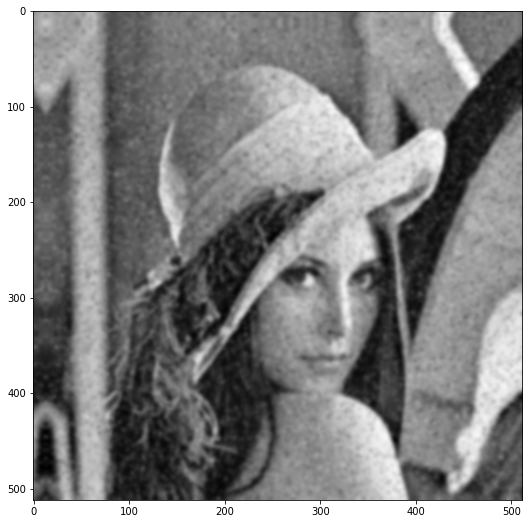

In [2]:
from math import pi, sqrt, exp
from a2_utils import gauss_noise, sp_noise

# from previous exercise
def get_gauss_kernell(size, sigma):
    kernel = list(map(
        lambda x: 1 / (sqrt(2 * pi) * sigma) * exp(-x ** 2 / (2 * sigma ** 2)),
        range(-size, size + 1)
    ))
    kernel2d = np.zeros((2 * size + 1, 2 * size + 1))
    kernel2d[2, :] = kernel # kernel should be in the middle row of square matrix
    return np.array(kernel2d)


I = cv2.imread('images/lena.png')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(16, 9))
plt.imshow(I, cmap='gray')
print('original')
plt.show()

plt.figure(figsize=(16, 9))
gauss_noise_I = gauss_noise(I, 100)
plt.imshow(gauss_noise_I, cmap='gray')
print('gauss noise')
plt.show()

kernel_x = get_gauss_kernell(15, 1)
filtred_I = cv2.filter2D(gauss_noise_I, -1, kernel_x)
filtred_I = cv2.filter2D(filtred_I, -1, kernel_x.T)
plt.figure(figsize=(16, 9))
plt.imshow(filtred_I, cmap='gray')
print('filtred gauss noise')
plt.show()

plt.figure(figsize=(16, 9))
sp_noise_I = sp_noise(I, 0.04)
plt.imshow(sp_noise_I, cmap='gray')
print('salt&pepper noise')
plt.show()

kernel_x = get_gauss_kernell(15, 2)
filtred_I = cv2.filter2D(sp_noise_I, -1, kernel_x)
filtred_I = cv2.filter2D(filtred_I, -1, kernel_x.T)
plt.figure(figsize=(16, 9))
plt.imshow(filtred_I, cmap='gray')
print('filtred s&p noise')
plt.show()

**Question**: Which noise is better removed using the Gaussian filter?

Answer: on gaussian noise, for salt and pepper is better some non-linear noise for example

### B) Image sharpening


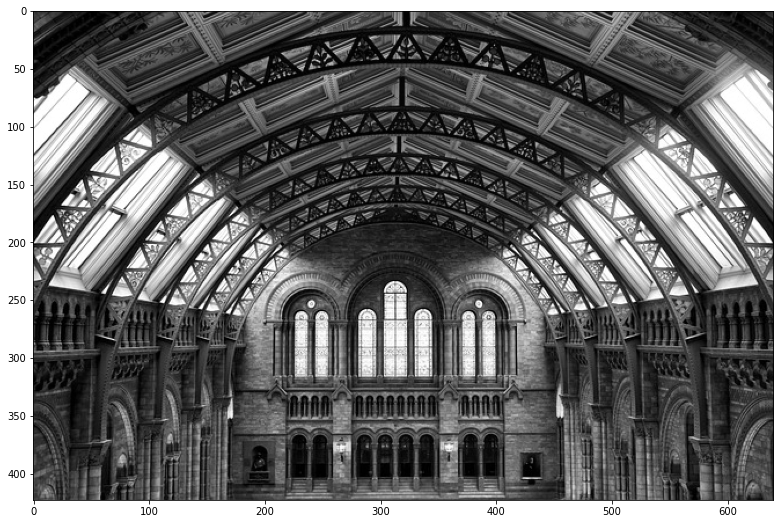

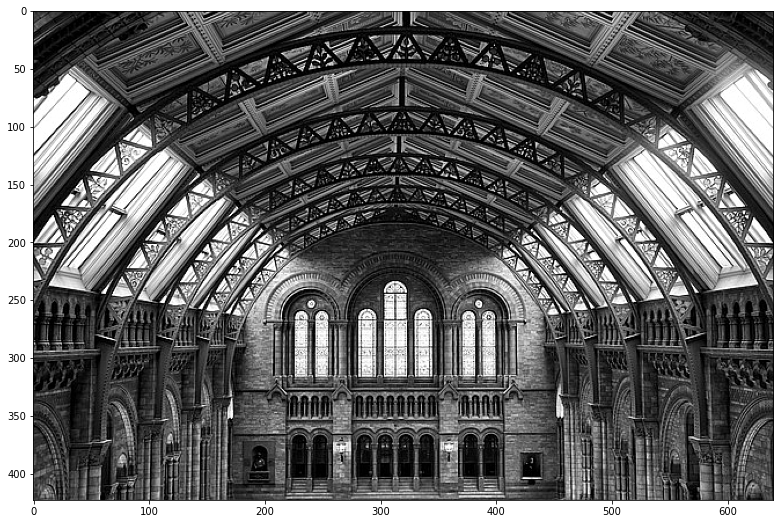

In [3]:


I = cv2.imread('images/museum.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(16, 9))
plt.imshow(I, cmap='gray')
plt.show()

# create kernel for sharpening
size = 3
k1 = np.zeros((size, size))
k1[1, 1] = 2
k2 = 1 / size ** 2 * np.ones((size, size))

kernel = k1 - k2
sharpened_I = cv2.filter2D(I, -1, kernel)

plt.figure(figsize=(16, 9))
plt.imshow(sharpened_I, cmap='gray')
plt.show()

### C) median filtering

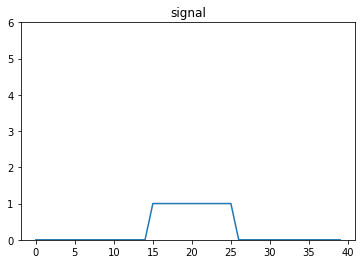

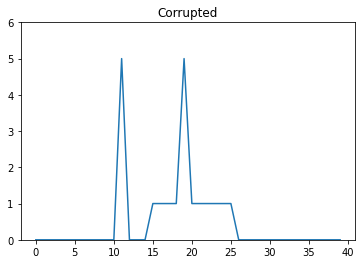

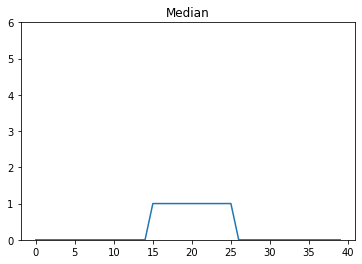

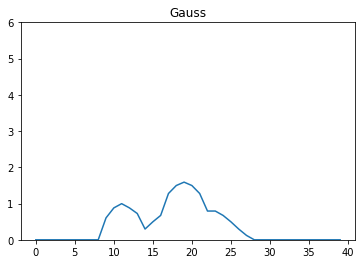

In [4]:
def simple_median(signal, width):
    if width % 2 != 1:
        raise Exception('wrong width size')
    N = (width - 1) // 2
    medians = np.zeros(np.shape(signal))
    for i in range(N, len(signal) - N):
        medians[i] = np.median(signal[i-N : i+N+1])
    return medians

# method from previous exercise
def get_gauss_kernel(size, sigma):
    kernel = list(map(
        lambda x: 1/(sqrt(2*pi)*sigma)*exp(-x**2/(2*sigma**2)),
        range(-size,size+1)
    ))
    return kernel

# method from previous exercise
def simple_convolution(signal, kernel):
    N = (len(kernel) - 1) // 2
    convolution = np.zeros(np.shape(signal))
    for i in range(N, len(signal) - N):
        for u in range(-N, N + 1):
            convolution[i] += kernel[N + u] * signal[i - u]
    return convolution

# method that set y-axes shown values
def limit_axis():
    ax = plt.gca()
    ax.set_ylim([0, 6])


signal = np.zeros((40))
signal[15:26] = 1
size_x = range(len(signal))
limit_axis()
plt.plot(size_x, signal)
plt.title('signal')
plt.show()

signal[[11,19]] = 5
limit_axis()
plt.plot(size_x, signal)
plt.title('Corrupted')
plt.show()

median_con = simple_median(signal, 5)
limit_axis()
plt.plot(size_x, median_con)
plt.title('Median')
plt.show()

gauss_con = simple_convolution(signal, get_gauss_kernel(2,2))
limit_axis()
plt.plot(size_x, gauss_con)
plt.title('Gauss')
plt.show()

**Question**: What is the computational complexity of the Gaussian filter operation?
How about the median filter? What does it depend on? Describe the computational
complexity using the O(·) notation (you can assume n log n complexity for sorting).

Answer: Assume that K is size of kernel and N is size of signal. Then:

+ Gaussian: O(K+K\*N)=O(K\*N) - make kernel + go throw all signal pixels
+ Median: O(K\*log(K)\*N)